In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Data Extraction

## **Source of Data**  
- This dataset is sourced from **Kaggle**, a popular platform for datasets and machine learning projects.  
- It contains information about **crop yields**, including factors like rainfall, pesticide usage, and temperature over different years and countries.  

## **Dataset Overview**  
1. **Area** This represents the geographical region (such as a country, state, or district) where the data was collected.  

2. **Item** – This specifies the type of crop or agricultural product being measured (e.g., wheat, rice, maize).  

3. **Year** – The year in which the data was recorded.  

4. **hg/ha_yield** – The crop yield measured in **hectograms per hectare (hg/ha)**. A hectogram (hg) is **100 grams**, so this column represents the amount of crop harvested per hectare of land.  

5. **average_rain_fall_mm_per_year** – The average annual rainfall in **millimeters (mm)** for the given area and year.  

6. **pesticides_tonnes** – The total amount of pesticides used in **tonnes (metric tons)** for that area and year.  

7. **avg_temp** – The average temperature (likely in **degrees Celsius**) for the given area and year.   

## **Goal of the Analysis**  
- Understand how **rainfall, pesticide usage, and temperature** affect crop yield.  
- Identify patterns and trends in agricultural productivity over time.  

# 2. Data Cleaning

## **Step 1:** Load Dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/sem_8_project/yield_df.csv')
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


## **Step 2:** Handle Missing Values

In [3]:
# Check for null values in the dataset
df.isnull().sum()

,0
Unnamed: 0,0
Area,0
Item,0
Year,0
hg/ha_yield,0
average_rain_fall_mm_per_year,0
pesticides_tonnes,0
avg_temp,0


In [4]:
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [5]:
df.tail()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76
28241,28241,Zimbabwe,Wheat,2013,22888,657.0,2550.07,19.76


## **Step 3:** Handle Duplicates

In [6]:
df.duplicated().sum()

np.int64(0)

## **Step 4:** Fix Data Types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [8]:
df['Area'] = df['Area'].astype('category')
df['Item'] = df['Item'].astype('category')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Unnamed: 0                     28242 non-null  int64   
 1   Area                           28242 non-null  category
 2   Item                           28242 non-null  category
 3   Year                           28242 non-null  int64   
 4   hg/ha_yield                    28242 non-null  int64   
 5   average_rain_fall_mm_per_year  28242 non-null  float64 
 6   pesticides_tonnes              28242 non-null  float64 
 7   avg_temp                       28242 non-null  float64 
dtypes: category(2), float64(3), int64(3)
memory usage: 1.4 MB


# Exploratory data analysis

In [10]:
df["Item"].unique()

['Maize', 'Potatoes', 'Rice, paddy', 'Sorghum', 'Soybeans', 'Wheat', 'Cassava', 'Sweet potatoes', 'Plantains and others', 'Yams']
Categories (10, object): ['Cassava', 'Maize', 'Plantains and others', 'Potatoes', ..., 'Soybeans',
                          'Sweet potatoes', 'Wheat', 'Yams']

In [11]:
df["Year"].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013])

In [12]:
df["hg/ha_yield"].mean()

np.float64(77053.33209404434)

In [13]:
df["hg/ha_yield"].mode()

,hg/ha_yield
0,10000


In [14]:
df["hg/ha_yield"].max()

501412

In [15]:
df["hg/ha_yield"].min()

50

In [16]:
df.describe()

,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,14120.500000,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,8152.907488,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,0.000000,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,7060.250000,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,14120.500000,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,21180.750000,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,28241.000000,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [17]:
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# Generate statistical summary
summary = df.describe(include='all')
summary

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242,28242,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
unique,101,10,NaN,NaN,NaN,NaN,NaN
top,India,Potatoes,NaN,NaN,NaN,NaN,NaN
freq,4048,4276,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,NaN,NaN,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,NaN,NaN,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,NaN,NaN,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,NaN,NaN,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,NaN,NaN,2008.000000,104676.750000,1668.00000,48687.880000,26.000000


### Correlation

In [18]:
# Compute correlation matrix
df.select_dtypes(include=['number']).corr()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Year,1.000000,0.091630,-0.003798,0.140930,0.014409
hg/ha_yield,0.091630,1.000000,0.000962,0.064085,-0.114777
average_rain_fall_mm_per_year,-0.003798,0.000962,1.000000,0.180984,0.313040
pesticides_tonnes,0.140930,0.064085,0.180984,1.000000,0.030946
avg_temp,0.014409,-0.114777,0.313040,0.030946,1.000000


### 🔥 Correlation Heatmap
The heatmap helps identify relationships between numerical variables.

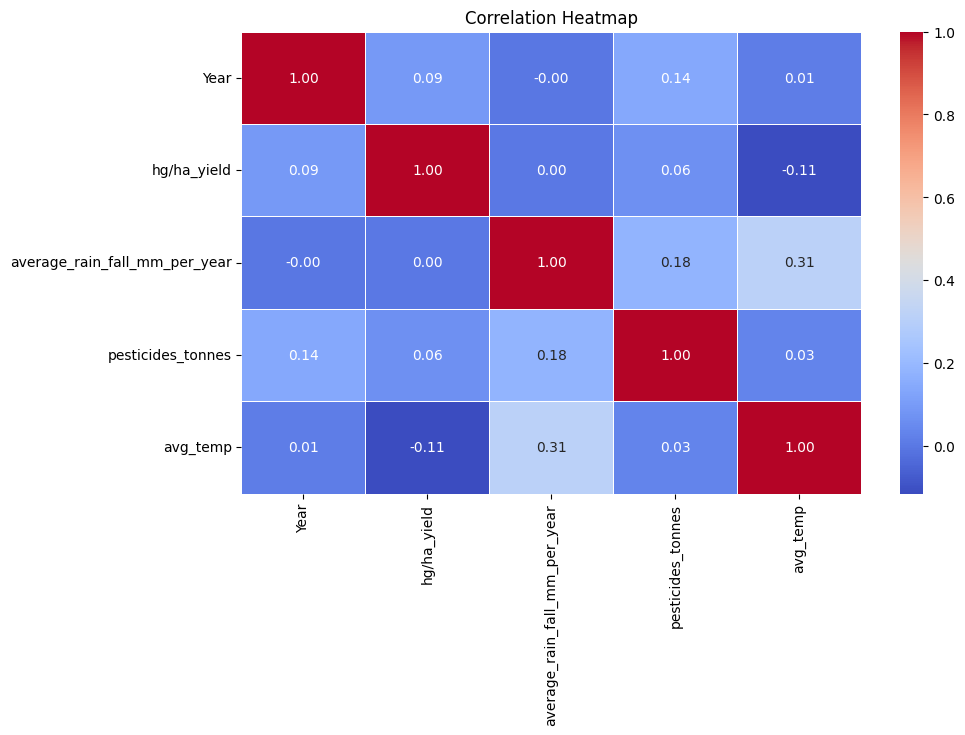

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Machine Learning Model

In [20]:
# Encode categorical features: Area and Item
df_encoded = pd.get_dummies(df, columns=['Area', 'Item'], drop_first=True)

# Check the new shape
df_encoded.shape

(28242, 114)

In [21]:
# Split features and target
X = df_encoded.drop(columns=['hg/ha_yield'])
y = df_encoded['hg/ha_yield']

## 🔍 Model 1: Linear Regression




In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print('Linear Regression R²:', r2_score(y_test, y_pred_lr))
print('MSE:', mean_squared_error(y_test, y_pred_lr))

Linear Regression R²: 0.7551423617508118
MSE: 1776116987.420408


In [23]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print('Random Forest R²:', r2_score(y_test, y_pred_rf))
print('MSE:', mean_squared_error(y_test, y_pred_rf))

Random Forest R²: 0.9874701196641542
MSE: 90887641.79042074


## ✅ Conclusion & Insights
- We built a regression pipeline to predict agricultural yield.
- Categorical variables like crop type and country were encoded.
- **Random Forest** generally performs better for this kind of data due to its ability to handle nonlinearities and interactions.
- Further improvements can be made with hyperparameter tuning or additional domain-specific features.

**Next Steps:**
- Tune models using GridSearchCV
- Try models like Gradient Boosting or XGBoost
- Visualize feature importance to gain more insight

## 🚀 Advanced Modeling: XGBoost
XGBoost is a powerful boosting algorithm known for its high performance in structured/tabular data problems.
Let's train it and evaluate the results.

In [24]:
from xgboost import XGBRegressor

# Train XGBoost
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Evaluation
print('XGBoost R²:', r2_score(y_test, y_pred_xgb))
print('MSE:', mean_squared_error(y_test, y_pred_xgb))

XGBoost R²: 0.9718120694160461
MSE: 204466096.0


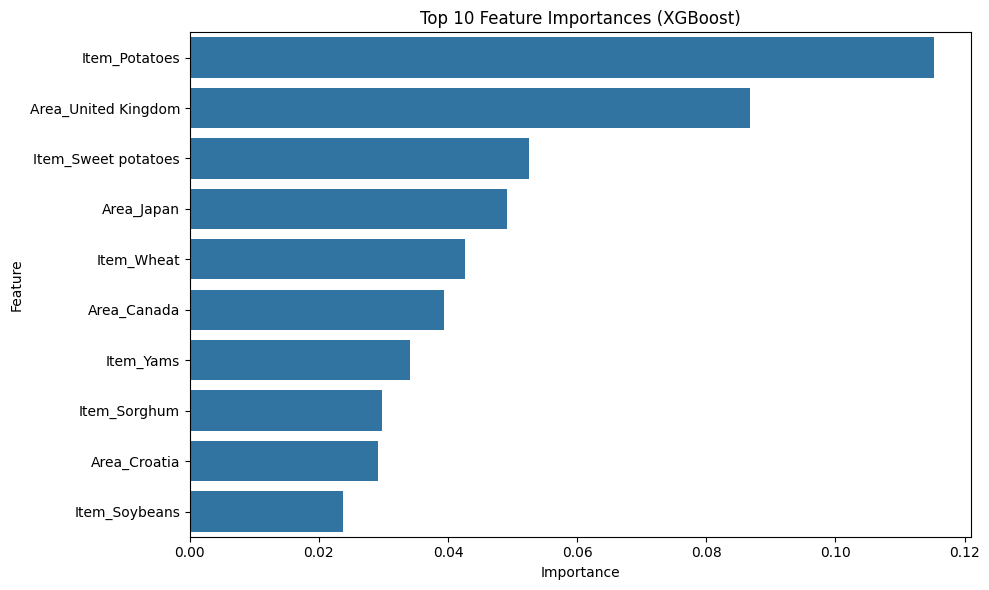

In [25]:
importances = xgb.feature_importances_
indices = np.argsort(importances)[-10:][::-1]  # Top 10 features
feature_names = X.columns[indices]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feature_names)
plt.title('Top 10 Feature Importances (XGBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Data Visualization

## Top 10 Countries by Average Crop Yield



<ipython-input-26-c528cf76c449>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Area")["hg/ha_yield"].mean().nlargest(10).plot(kind='bar', color='green', figsize=(10,5))


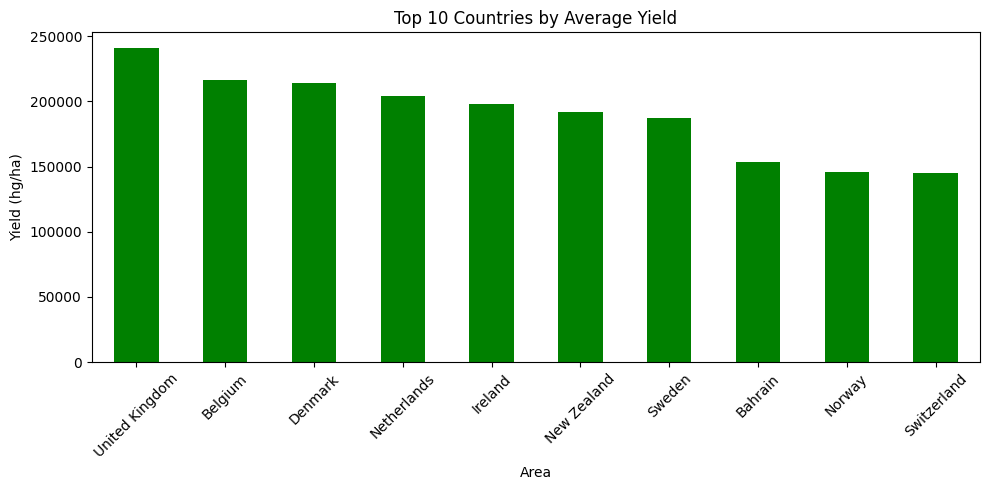

In [26]:
df.groupby("Area")["hg/ha_yield"].mean().nlargest(10).plot(kind='bar', color='green', figsize=(10,5))
plt.title("Top 10 Countries by Average Yield")
plt.ylabel("Yield (hg/ha)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-27-1f0c7fc5a615>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_items = df.groupby("Item")["hg/ha_yield"].mean().sort_values(ascending=False).head(10)
<ipython-input-27-1f0c7fc5a615>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


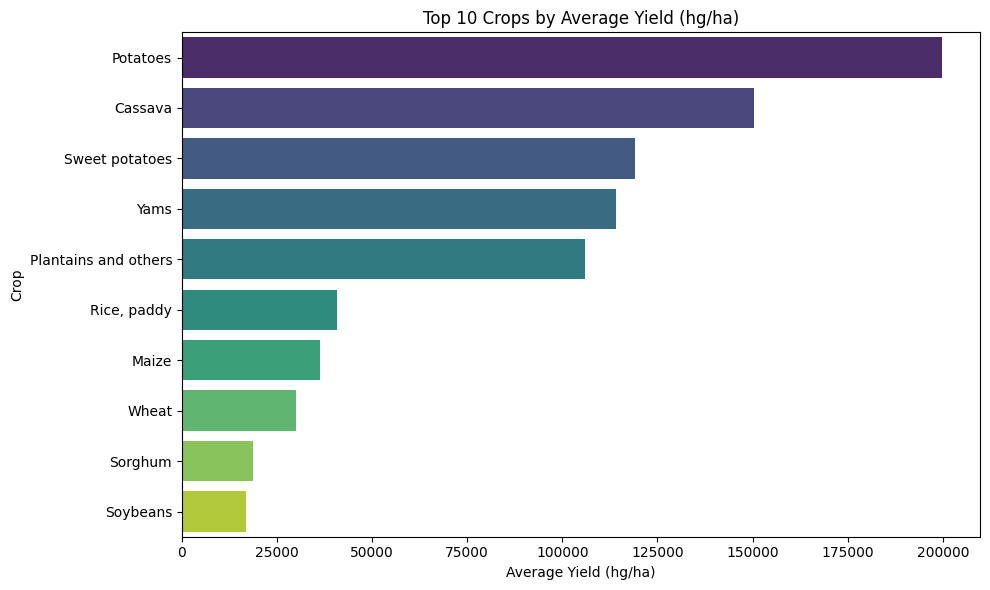

In [27]:
top_items = df.groupby("Item")["hg/ha_yield"].mean().sort_values(ascending=False).head(10)

# Convert to DataFrame and reset index to preserve order
top_items_df = top_items.reset_index()

# Plot with proper sorting
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_items_df,
    y='Item',
    x='hg/ha_yield',
    order=top_items_df['Item'],  # preserves descending order
    palette='viridis'
)
plt.title("Top 10 Crops by Average Yield (hg/ha)")
plt.xlabel("Average Yield (hg/ha)")
plt.ylabel("Crop")
plt.tight_layout()
plt.show()

<ipython-input-28-0b4d5163595c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_areas = df.groupby("Area")["hg/ha_yield"].sum().nlargest(10)


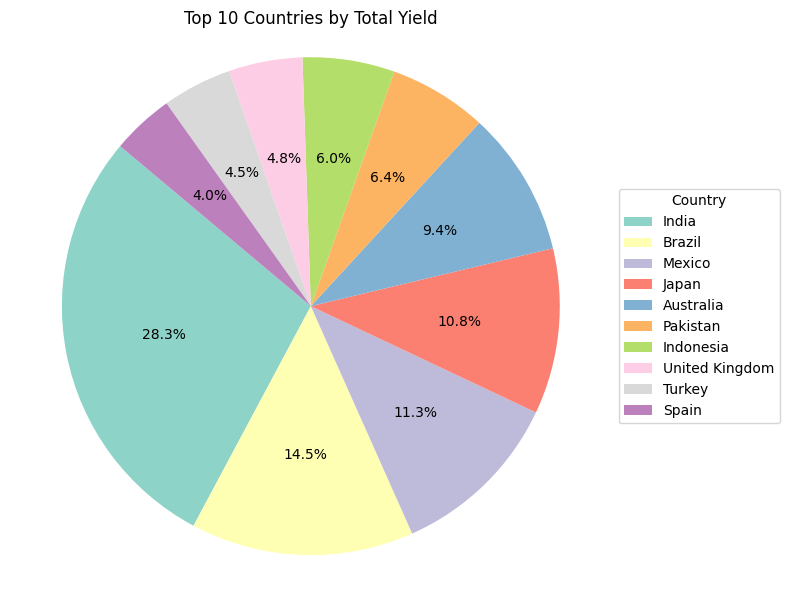

In [28]:
# 3. Pie Chart: Top 10 Areas by Total Yield Contribution
top_areas = df.groupby("Area")["hg/ha_yield"].sum().nlargest(10)
colors = sns.color_palette('Set3', n_colors=10)

fig, ax = plt.subplots(figsize=(8, 6))

# Pie chart
wedges, texts, autotexts = ax.pie(
    top_areas.values,
    labels=None,  # Hide labels on the pie
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 10}
)
ax.set_title("Top 10 Countries by Total Yield")
ax.axis('equal')

# Legend with country names and color mapping (like line chart style)
ax.legend(
    wedges,
    top_areas.index,
    title="Country",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=10
)

plt.tight_layout()
plt.show()

## Crop Yield Trends Over the Years

This line chart shows how the yields of various crops have changed from 1990 to around 2013. The yields are measured in hectograms per hectare (hg/ha). Each line represents a different crop, such as potatoes, maize, cassava, and rice. The shaded regions indicate the variability or uncertainty in the data. Overall, most crops show an increasing trend in yield over time, reflecting improvements in agricultural practices and technology.


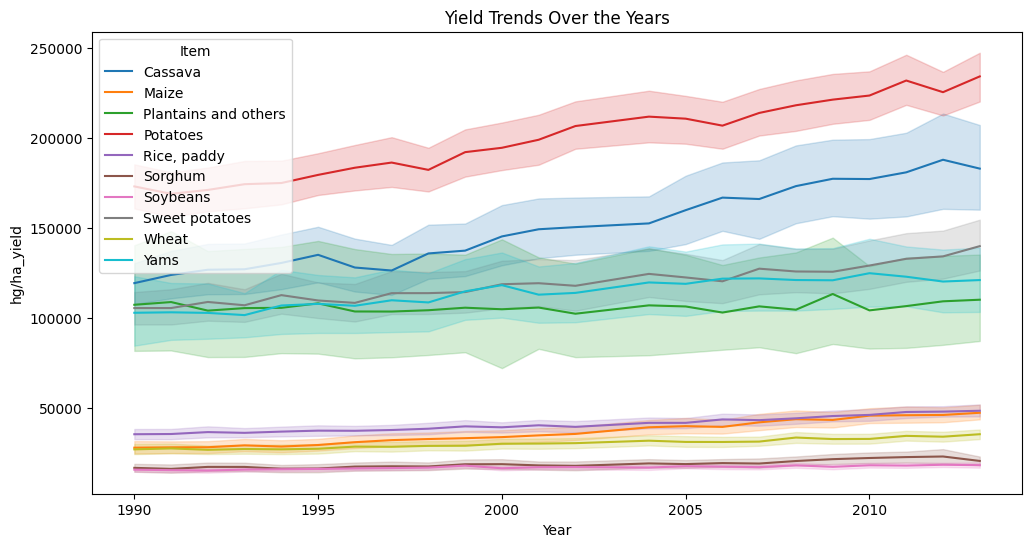

In [29]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Year', y='hg/ha_yield', hue='Item', estimator='mean')
plt.title("Yield Trends Over the Years")
plt.show()

## **Crop Yield Over Time**  
This graph shows whether crop yield has increased or decreased over the years.

<ipython-input-30-e5b3489687ff>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Year", y="hg/ha_yield", data=df, ci=None, marker="o", color="blue")


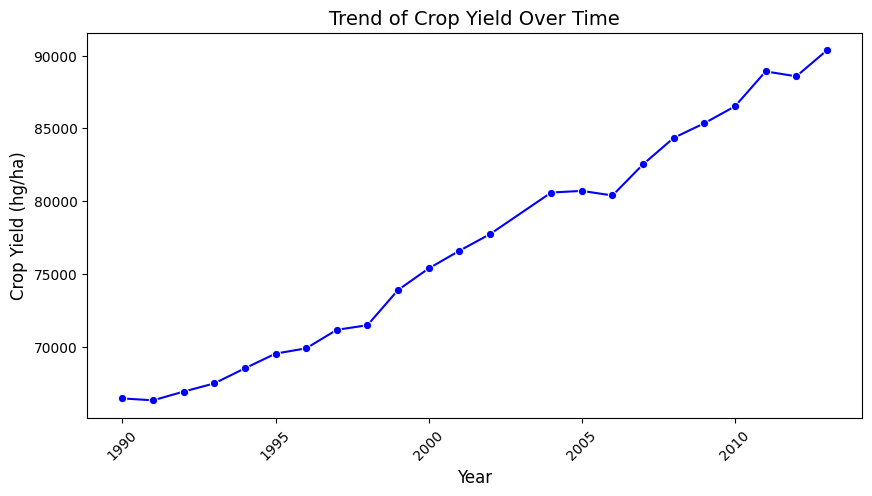

In [30]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="Year", y="hg/ha_yield", data=df, ci=None, marker="o", color="blue")
plt.title("Trend of Crop Yield Over Time", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Crop Yield (hg/ha)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

## **Impact of Rainfall on Crop Yield**  
This scatter plot shows whether more rainfall leads to higher crop yields.

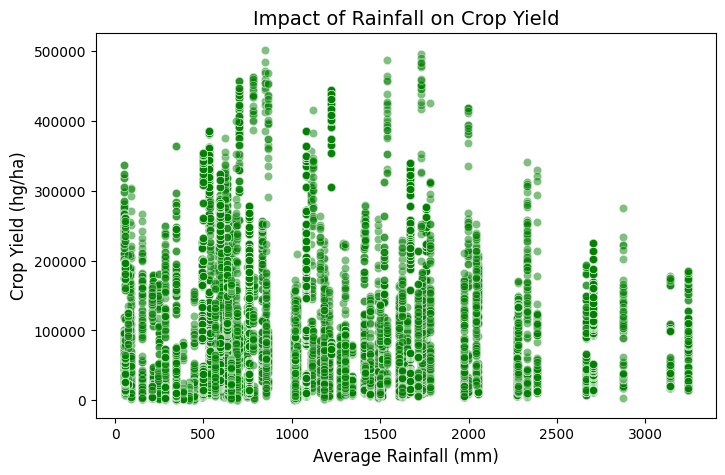

In [31]:
# Scatter plot: Rainfall vs Crop Yield
plt.figure(figsize=(8, 5))
sns.scatterplot(x="average_rain_fall_mm_per_year", y="hg/ha_yield", data=df, alpha=0.5, color="green")
plt.title("Impact of Rainfall on Crop Yield", fontsize=14)
plt.xlabel("Average Rainfall (mm)", fontsize=12)
plt.ylabel("Crop Yield (hg/ha)", fontsize=12)
plt.show()


## **Impact of Temperature on Crop Yield**  
This scatter plot shows whether higher temperatures affect crop yields positively or negatively.


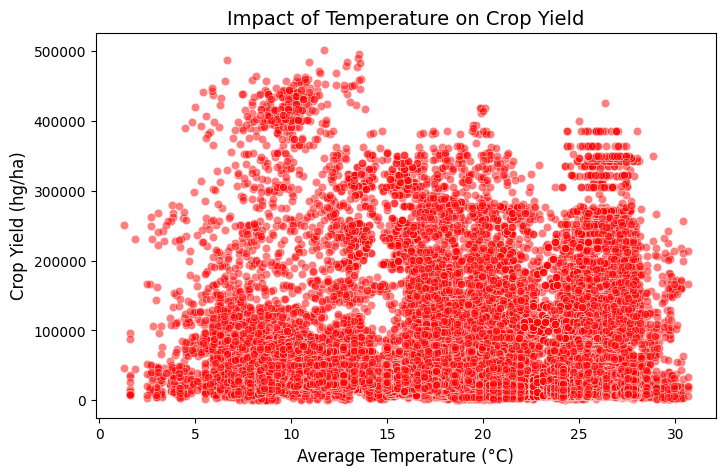

In [32]:
# Scatter plot: Temperature vs Crop Yield
plt.figure(figsize=(8, 5))
sns.scatterplot(x="avg_temp", y="hg/ha_yield", data=df, alpha=0.5, color="red")
plt.title("Impact of Temperature on Crop Yield", fontsize=14)
plt.xlabel("Average Temperature (°C)", fontsize=12)
plt.ylabel("Crop Yield (hg/ha)", fontsize=12)
plt.show()


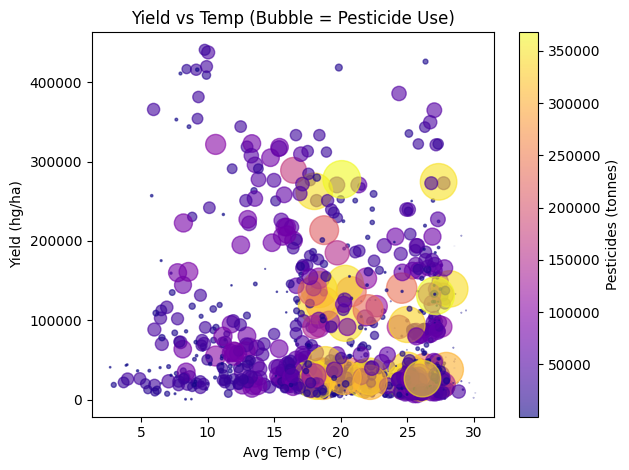

In [33]:
df = df.sample(1000, random_state=1)
plt.scatter(df['avg_temp'], df['hg/ha_yield'],
            s=df['pesticides_tonnes']/500, c=df['pesticides_tonnes'],
            cmap='plasma', alpha=0.6)
plt.colorbar(label='Pesticides (tonnes)')
plt.title("Yield vs Temp (Bubble = Pesticide Use)")
plt.xlabel("Avg Temp (°C)")
plt.ylabel("Yield (hg/ha)")
plt.tight_layout()
plt.show()

## **Pesticide Usage Over the Years**  
This graph shows whether pesticide use has increased or decreased over time.

<ipython-input-34-8b470c9d2eee>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Year", y="pesticides_tonnes", data=df, ci=None, marker="o", color="purple")


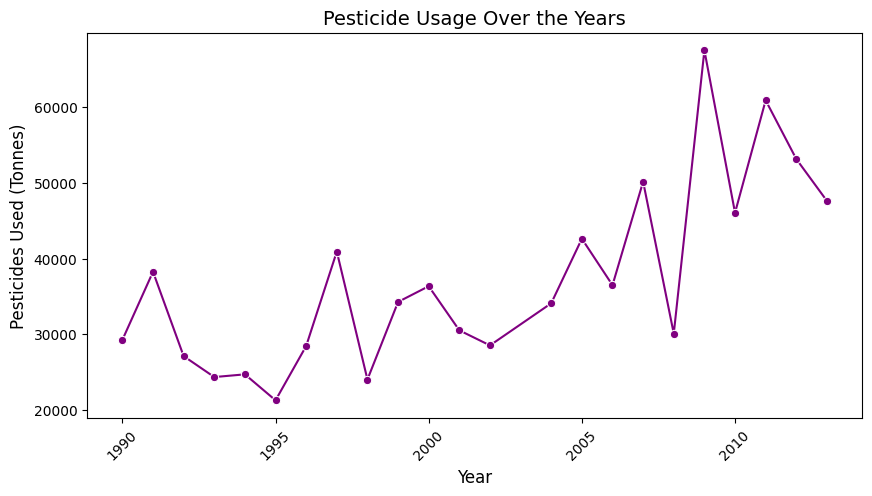

In [34]:
# Line plot: Pesticide usage over time
plt.figure(figsize=(10, 5))
sns.lineplot(x="Year", y="pesticides_tonnes", data=df, ci=None, marker="o", color="purple")
plt.title("Pesticide Usage Over the Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Pesticides Used (Tonnes)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

## **Average Crop Yield by Crop Type**  
This graph shows the average yield of different crops, measured in **hectograms per hectare (hg/ha)**.


<ipython-input-35-9284bd5e9938>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Item", y="hg/ha_yield", palette="magma")


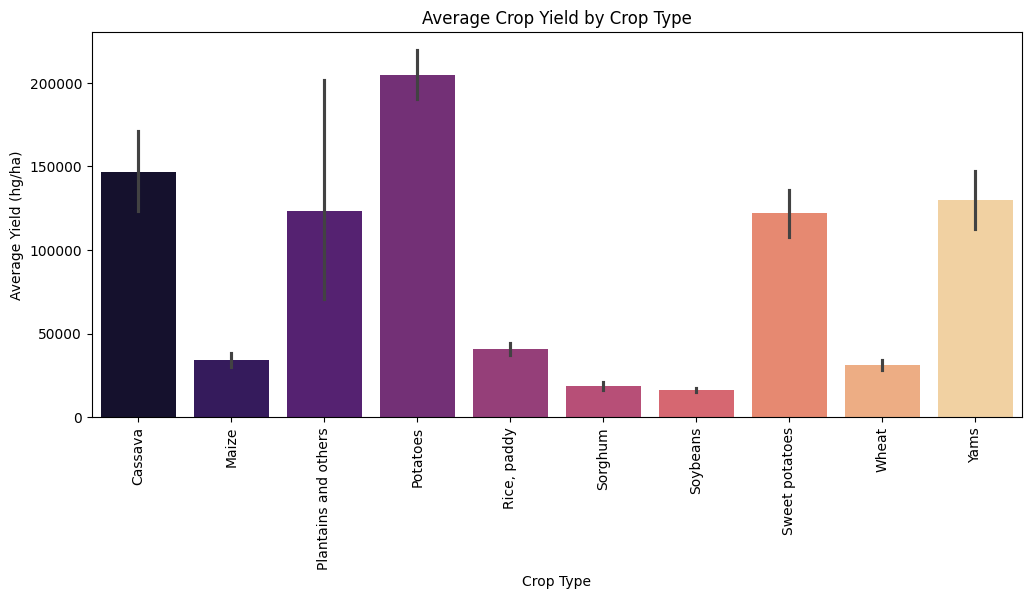

In [35]:
plt.figure(figsize=(12,5))
sns.barplot(data=df, x="Item", y="hg/ha_yield", palette="magma")
plt.xticks(rotation=90)
plt.title("Average Crop Yield by Crop Type")
plt.xlabel("Crop Type")
plt.ylabel("Average Yield (hg/ha)")
plt.show()

## **Distribution of Crop Yield**  
This histogram shows the distribution of crop yields (hg/ha), with a kernel density estimate (KDE) overlay to highlight the overall trend.  


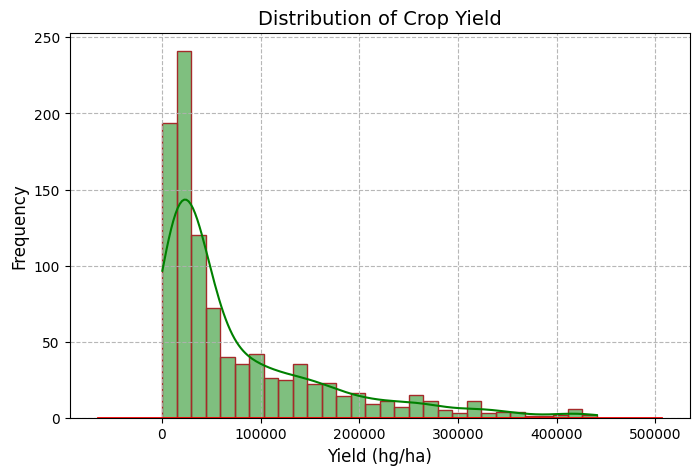

In [36]:
plt.figure(figsize=(8,5))
sns.histplot(df["hg/ha_yield"], bins=30, color="green", edgecolor="brown", alpha=0.5,kde=True)
sns.kdeplot(df["hg/ha_yield"], color="red", linewidth=2)
plt.title("Distribution of Crop Yield", fontsize=14)
plt.xlabel("Yield (hg/ha)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.9)
plt.show()

## **Yield vs. Pesticides (tonnes)**  
This scatter plot shows the relationship between pesticide usage (in tonnes) and crop yield (in hectograms per hectare).  


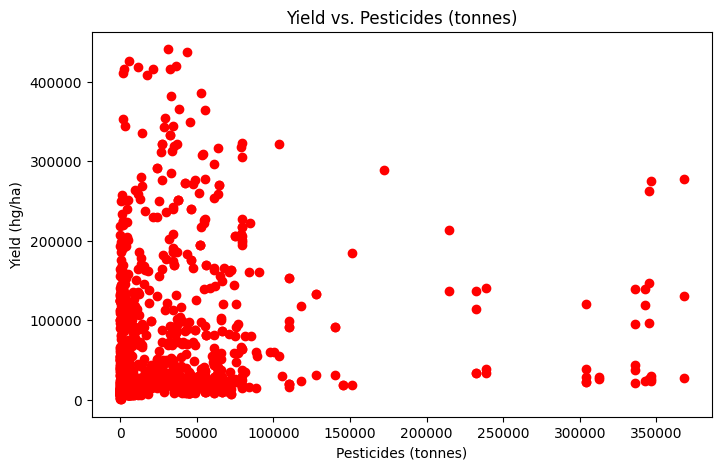

In [37]:
plt.figure(figsize=(8, 5))
plt.scatter(df['pesticides_tonnes'], df['hg/ha_yield'], c='red')
plt.title('Yield vs. Pesticides (tonnes)')
plt.xlabel('Pesticides (tonnes)')
plt.ylabel('Yield (hg/ha)')
plt.show()

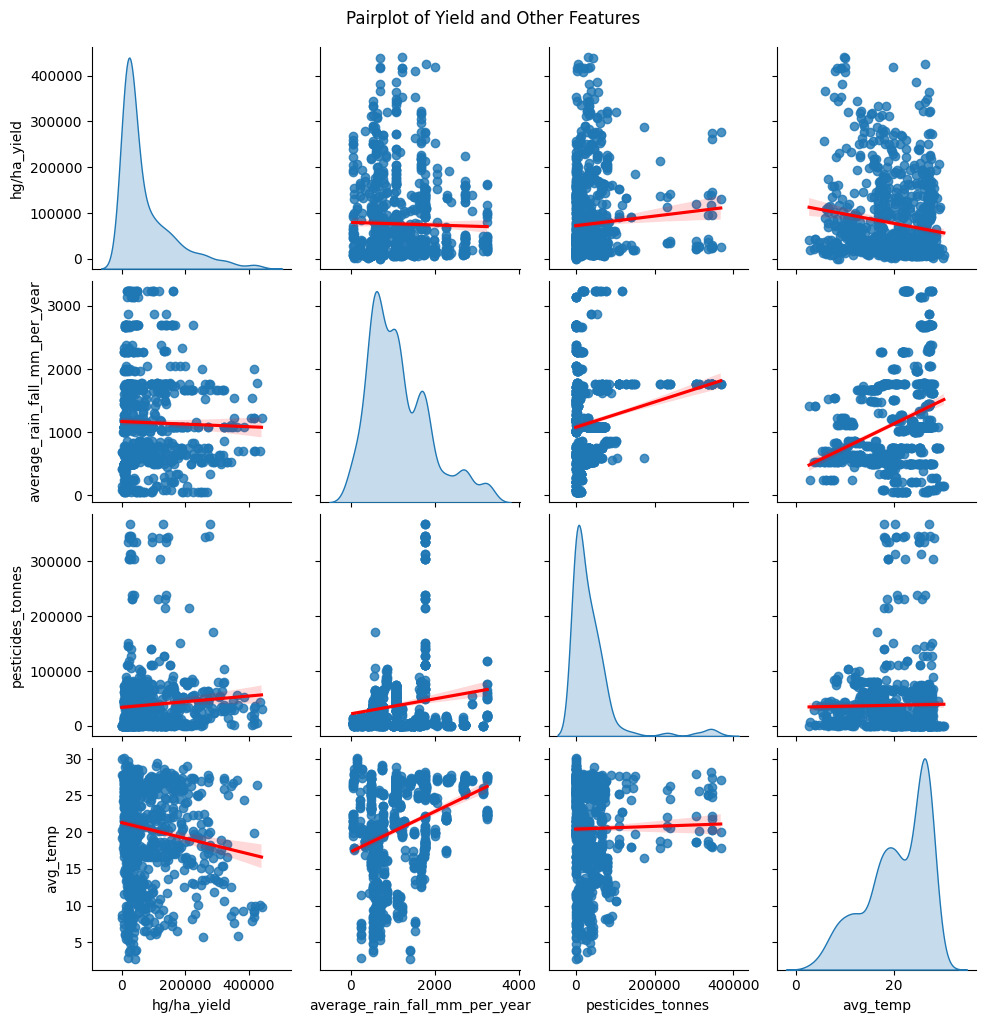

In [38]:
# Pairplot to visualize relationships between features
sns.pairplot(df, vars=['hg/ha_yield', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'],
             kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}})
plt.suptitle('Pairplot of Yield and Other Features', y=1.02)
plt.show()

## Analysis of Yield Correlations

### 1. Yield and Rainfall  
There is a **weak positive correlation** between yield and rainfall, meaning that higher rainfall is slightly associated with increased yield. However, the relationship is not strong enough to be considered a significant factor.  

### 2. Yield and Pesticides  
The correlation between pesticide usage and yield is **weakly positive**, suggesting that while pesticide application may contribute to yield improvement, it does not have a strong impact on its own.  

### 3. Yield and Temperature  
There is a **weak negative correlation** between temperature and yield, indicating that higher temperatures may slightly reduce crop yield, possibly due to heat stress affecting plant growth.  


# 🔍 Final Conclusion of Data Analysis

## 📌 Key Insights

---

### ✅ Top Performing Countries
- Countries like **United Kingdom**, **Belgium**, **Denmark**, and the **Netherlands** consistently show the **highest average crop yields**.
- This reflects:
  - **Advanced agricultural infrastructure**
  - **Efficient use of resources**
  - **Modern farming techniques** and practices

---

### 🌦️ Crop Yield Influencing Factors
- From the **correlation analysis**:
  - **Rainfall** and **temperature** have a **moderate positive influence** on yield.
  - **Pesticide usage** displays a **non-linear relationship**:
    - Moderate use contributes to yield.
    - Excessive use **does not guarantee better productivity** and may even be harmful.
- The **scatter** and **bubble plots** visualize how temperature and pesticide usage interact with yield across different conditions.

---

### 📈 Crop Trends Over Time
- Yields have **generally increased over time** for crops such as:
  - **Potatoes**
  - **Rice**
  - **Cassava**
- This suggests:
  - **Ongoing agricultural development**
  - **Technological improvements**
  - **Better crop management**
- However, some crops show **little or uneven growth** in yield over time.  
  This might be because of:
  - **Changing weather patterns**
  - **Different farming practices**
  - **Poor soil quality or outdated methods**

---

### 🌾 Top Yielding Crops
- Crops with the **highest global yield** include:
  - **Potatoes**
  - **Cassava**
  - **Maize**
- These are **strategically important crops** for food security and economic development.


